In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis, norm
#from sklearn.cluster import DBSCAN, HDBSCAN
#from sklearn.preprocessing import quantile_transform
import blimpy as bl
import setigen as stg
from astropy import units as u
import psutil
%matplotlib inline

In [79]:
cf-hbw

1420.539793

extracting integration 0...


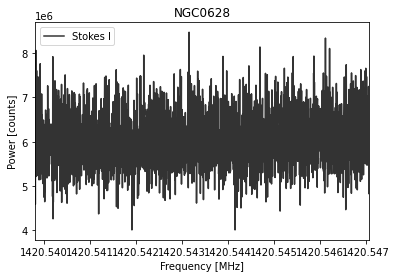

In [97]:
cf = 1420.543436
hbw = 0.003643
fb = bl.Waterfall('/datag/pipeline/AGBT21A_996_47/blc03/blc03_guppi_59405_48425_NGC0628_0040.rawspec.0000.h5',
                  f_start = 1581.679688-hbw, f_stop = 1581.679688+hbw)
fb1 = bl.Waterfall('/datag/pipeline/AGBT21A_996_47/blc04/blc04_guppi_59405_48425_NGC0628_0040.rawspec.0000.h5',
                  f_start = cf-hbw, f_stop = cf+hbw)
fb2 = bl.Waterfall('/datag/pipeline/AGBT21A_996_47/blc04/blc04_guppi_59405_49069_NGC0628_0042.rawspec.0000.h5',
                  f_start = cf-hbw, f_stop = cf+hbw)
fb3 = bl.Waterfall('/datag/pipeline/AGBT21A_996_47/blc04/blc04_guppi_59405_49707_NGC0628_0044.rawspec.0000.h5',
                  f_start = cf-hbw, f_stop = cf+hbw)
#fb1.plot_waterfall()
fb1.plot_spectrum()
fr = stg.Frame(waterfall=fb)
fr1 = stg.Frame(waterfall=fb1)
fr2 = stg.Frame(waterfall=fb2)
fr3 = stg.Frame(waterfall=fb3)

In [73]:
print(fr.data.shape)

(16, 2608)


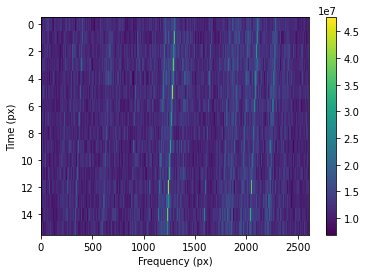

In [69]:
frame = stg.Frame.from_data(df=2.7939677238464355e-06*u.MHz,
                            dt=18.253611008*u.s,
                            fch1=(1581.679688-hbw)*u.MHz,
                            ascending=True, # fch1 is a minimum
                            data=fr.data)
frame.plot()

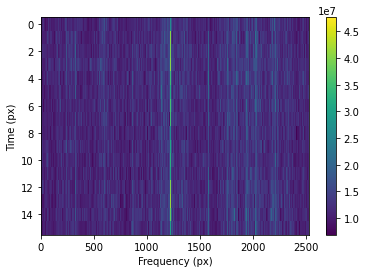

In [70]:
dd_fr1 = stg.dedrift(frame1, -0.755753)
dd_fr1.plot()

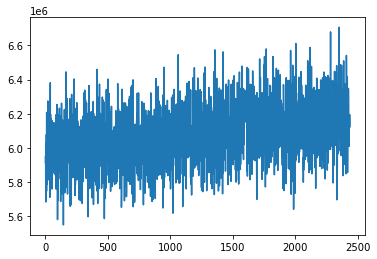

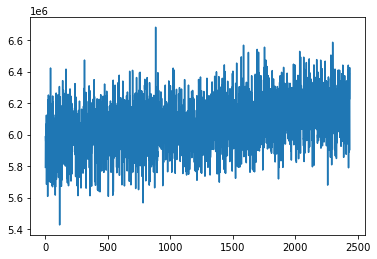

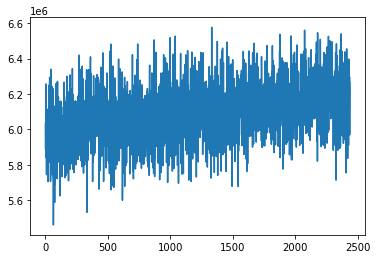

In [159]:
frame1 = stg.Frame.from_data(df=2.7939677238464355e-06*u.MHz,
                            dt=18.253611008*u.s,
                            fch1=(cf-hbw)*u.MHz,
                            ascending=True, # fch1 is a minimum
                            data=fr1.data)

frame2 = stg.Frame.from_data(df=2.7939677238464355e-06*u.MHz,
                            dt=18.253611008*u.s,
                            fch1=(cf-hbw)*u.MHz,
                            ascending=True, # fch1 is a minimum
                            data=fr2.data)

frame3 = stg.Frame.from_data(df=2.7939677238464355e-06*u.MHz,
                            dt=18.253611008*u.s,
                            fch1=(cf-hbw)*u.MHz,
                            ascending=True, # fch1 is a minimum
                            data=fr3.data)
    
drift = 1.617
dd_fr1 = stg.dedrift(frame1, drift)
dd_fr2 = stg.dedrift(frame2, drift)
dd_fr3 = stg.dedrift(frame3, drift)
spec1 = stg.integrate(dd_fr1)
spec2 = stg.integrate(dd_fr2)
spec3 = stg.integrate(dd_fr3)

plt.plot(spec1)
plt.show()
plt.plot(spec2)
plt.show()
plt.plot(spec3)
plt.show()

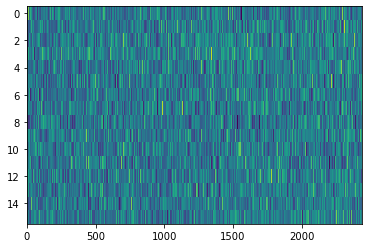

In [160]:
plt.imshow(dd_fr1.data, aspect='auto', interpolation='none')
plt.show()

In [101]:
freqs, data = fb1.grab_data()

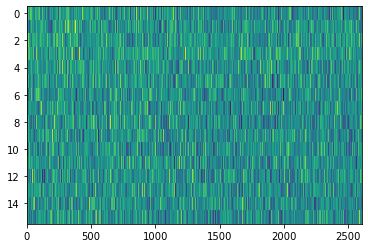

In [102]:
plt.imshow(np.log10(data), aspect='auto', interpolation='none')

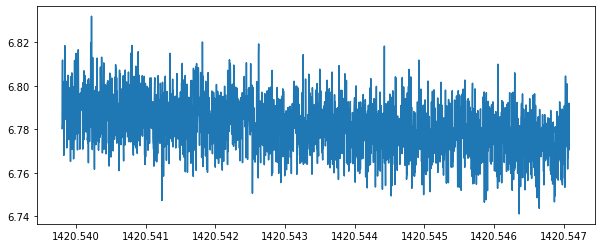

In [105]:
fig = plt.figure(figsize=(10, 4))
plt.plot(freqs, np.average(np.log10(fr1.data), axis=0))
plt.show()

In [76]:
print(len(spec1))

2439


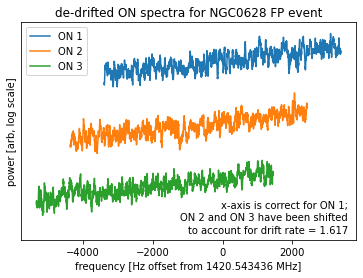

In [162]:
from scipy.signal import savgol_filter

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

smooth_spec = savgol_filter(spec, 15, 9, deriv=0, delta=1.0, axis=-1, mode='interp', cval=0.0)
window = 11
smooth_spec1 = moving_average(np.log10(spec1**2), 11)
smooth_spec2 = moving_average(np.log10(spec2**2), 11)
smooth_spec3 = moving_average(np.log10(spec3**2), 11)

drift = 1.617
offset_10min = drift * 600
offset_20min = drift * 1200
#plt.plot(spec)
plt.plot(np.arange(-len(smooth_spec1)//2, len(smooth_spec1)//2)*2.7939677238464355, smooth_spec1/np.average(smooth_spec1)+0.01, label='ON 1')
plt.plot(np.arange(-len(smooth_spec1)//2, len(smooth_spec1)//2)*2.7939677238464355 - offset_10min, smooth_spec2/np.average(smooth_spec1)+0.005, label='ON 2')
plt.plot(np.arange(-len(smooth_spec1)//2, len(smooth_spec1)//2)*2.7939677238464355 - offset_20min, smooth_spec3/np.average(smooth_spec1), label='ON 3')
plt.xlabel(f'frequency [Hz offset from {cf} MHz]')
plt.ylabel('power [arb, log scale]')
plt.yticks([])
plt.title('de-drifted ON spectra for NGC0628 FP event')
plt.text(3600, 0.9985, 'x-axis is correct for ON 1;', ha='right')
plt.text(3600, 0.9975, 'ON 2 and ON 3 have been shifted', ha='right')
plt.text(3600, 0.9965, 'to account for drift rate = 1.617', ha='right')
#plt.xlim(-6000, 4000)
plt.ylim(0.996, 1.013)
plt.legend()
plt.savefig('/datax/scratch/benjb/C23_L_M31_injections/HDBSCAN/pngs/NGC0628_spectrum_check.pdf', bbox_inches='tight')
plt.show()

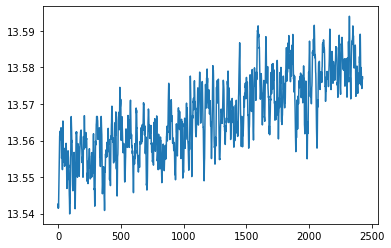

In [117]:
plt.plot(moving_average(np.log10(smooth_spec**2), 11))
plt.show()

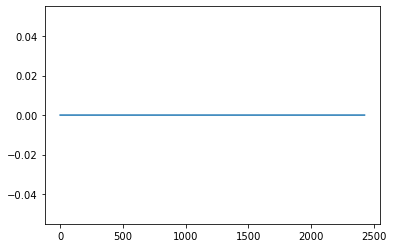

In [39]:
plt.plot(smooth_spec3-smooth_spec2)
plt.show()

In [ ]:
# need to put signals in full cadences, not single observations
# adapt RecoveryTest.py 

In [2]:
csv_file = '/home/cgchoza/galaxies/complete_cadences_catalog.csv'

df = pd.read_csv(csv_file)
dfl = df.iloc[np.where(df['Band'].values == 'L')[0]]

del df

In [5]:
for i in dfl.iloc[np.where(dfl['Target'].values == 'NGC0628')[0]]['.h5 path'].values:
    if 'NGC0628' in i:
        print(i)

/datag/pipeline/AGBT21A_996_47/blc00/blc00_guppi_59405_48425_NGC0628_0040.rawspec.0000.h5
/datag/pipeline/AGBT21A_996_47/blc00/blc00_guppi_59405_49069_NGC0628_0042.rawspec.0000.h5
/datag/pipeline/AGBT21A_996_47/blc00/blc00_guppi_59405_49707_NGC0628_0044.rawspec.0000.h5
/datag/pipeline/AGBT21A_996_47/blc00/blc00_guppi_59405_48425_NGC0628_0040.rawspec.0000.h5
/datag/pipeline/AGBT21A_996_47/blc00/blc00_guppi_59405_49069_NGC0628_0042.rawspec.0000.h5
/datag/pipeline/AGBT21A_996_47/blc00/blc00_guppi_59405_49707_NGC0628_0044.rawspec.0000.h5
/datag/pipeline/AGBT21A_996_47/blc01/blc01_guppi_59405_48425_NGC0628_0040.rawspec.0000.h5
/datag/pipeline/AGBT21A_996_47/blc01/blc01_guppi_59405_49069_NGC0628_0042.rawspec.0000.h5
/datag/pipeline/AGBT21A_996_47/blc01/blc01_guppi_59405_49707_NGC0628_0044.rawspec.0000.h5
/datag/pipeline/AGBT21A_996_47/blc02/blc02_guppi_59405_48425_NGC0628_0040.rawspec.0000.h5
/datag/pipeline/AGBT21A_996_47/blc02/blc02_guppi_59405_49069_NGC0628_0042.rawspec.0000.h5
/datag/pip

In [20]:
for dat in dfl.iloc[np.where(dfl['Target'].values == 'MESSIER033')[0]]['.h5 path'].values:
    if ('blc03' in dat) | ('blc05' in dat):
        print(dat)

/datag/pipeline/AGBT22B_999_19/blc03_blp03/blc03_guppi_59884_32541_MESSIER033_0010.rawspec.0000.h5
/datag/pipeline/AGBT22B_999_19/blc03_blp03/blc03_guppi_59884_32854_HIP7229_0011.rawspec.0000.h5
/datag/pipeline/AGBT22B_999_19/blc03_blp03/blc03_guppi_59884_33167_MESSIER033_0012.rawspec.0000.h5
/datag/pipeline/AGBT22B_999_19/blc03_blp03/blc03_guppi_59884_33484_HIP7612_0013.rawspec.0000.h5
/datag/pipeline/AGBT22B_999_19/blc03_blp03/blc03_guppi_59884_33801_MESSIER033_0014.rawspec.0000.h5
/datag/pipeline/AGBT22B_999_19/blc03_blp03/blc03_guppi_59884_34123_HIP7960_0015.rawspec.0000.h5
/datag/pipeline/AGBT22B_999_19/blc05_blp05/blc05_guppi_59884_32541_MESSIER033_0010.rawspec.0000.h5
/datag/pipeline/AGBT22B_999_19/blc05_blp05/blc05_guppi_59884_32854_HIP7229_0011.rawspec.0000.h5
/datag/pipeline/AGBT22B_999_19/blc05_blp05/blc05_guppi_59884_33167_MESSIER033_0012.rawspec.0000.h5
/datag/pipeline/AGBT22B_999_19/blc05_blp05/blc05_guppi_59884_33484_HIP7612_0013.rawspec.0000.h5
/datag/pipeline/AGBT22B_9

In [3]:
h5_list = ['/datag/pipeline/AGBT19B_999_121/blc74_blp04/blc74_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc74_blp04/blc74_guppi_58832_16530_HIP2792_0058.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc74_blp04/blc74_guppi_58832_16851_MESSIER031_0059.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc74_blp04/blc74_guppi_58832_17168_HIP3077_0060.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc74_blp04/blc74_guppi_58832_17485_MESSIER031_0061.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc74_blp04/blc74_guppi_58832_17801_HIP3223_0062.gpuspec.0000.h5']

In [5]:
fb = bl.Waterfall('/datag/pipeline/AGBT19B_999_121/blc75_blp05/blc75_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5')
fb.info()


--- File Info ---
DIMENSION_LABELS : [b'time' b'feed_id' b'frequency']
        az_start :                              0.0
       data_type :                                1
            fch1 :           1313.9648423530161 MHz
            foff :      -2.7939677238464355e-06 MHz
           ibeam :                                1
      machine_id :                               20
          nbeams :                                1
           nbits :                               32
          nchans :                         67108864
            nifs :                                1
     rawdatafile : guppi_58832_16209_MESSIER031_0057.0000.raw
     source_name :                       MESSIER031
         src_dej :                      41:16:03.72
         src_raj :                      0:42:44.448
    telescope_id :                                6
           tsamp :                     18.253611008
   tstart (ISOT) :          2019-12-15T04:30:09.000
    tstart (MJD) :                

Reading Waterfalls ...
5727
1350.0080010853708
Done reading Waterfalls 3.3690991401672363.
Beginning Frame construction ...
Done with Frame construction 0.04648590087890625
Converting to Cadence ...
Done converting 0.00025963783264160156.
Adding signal ...
Done adding signal 0.21253585815429688.
Attempting to add block with signal to .h5 ...
blimpy.waterfall INFO     __write_to_hdf5_light: Writing the spectra matrix for /datax/scratch/benjb/C23_L_M31_injections/blc74_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5 without blobbing.
blimpy.waterfall INFO     Conversion time: 4.87sec
Plotting ...


<Figure size 720x720 with 0 Axes>

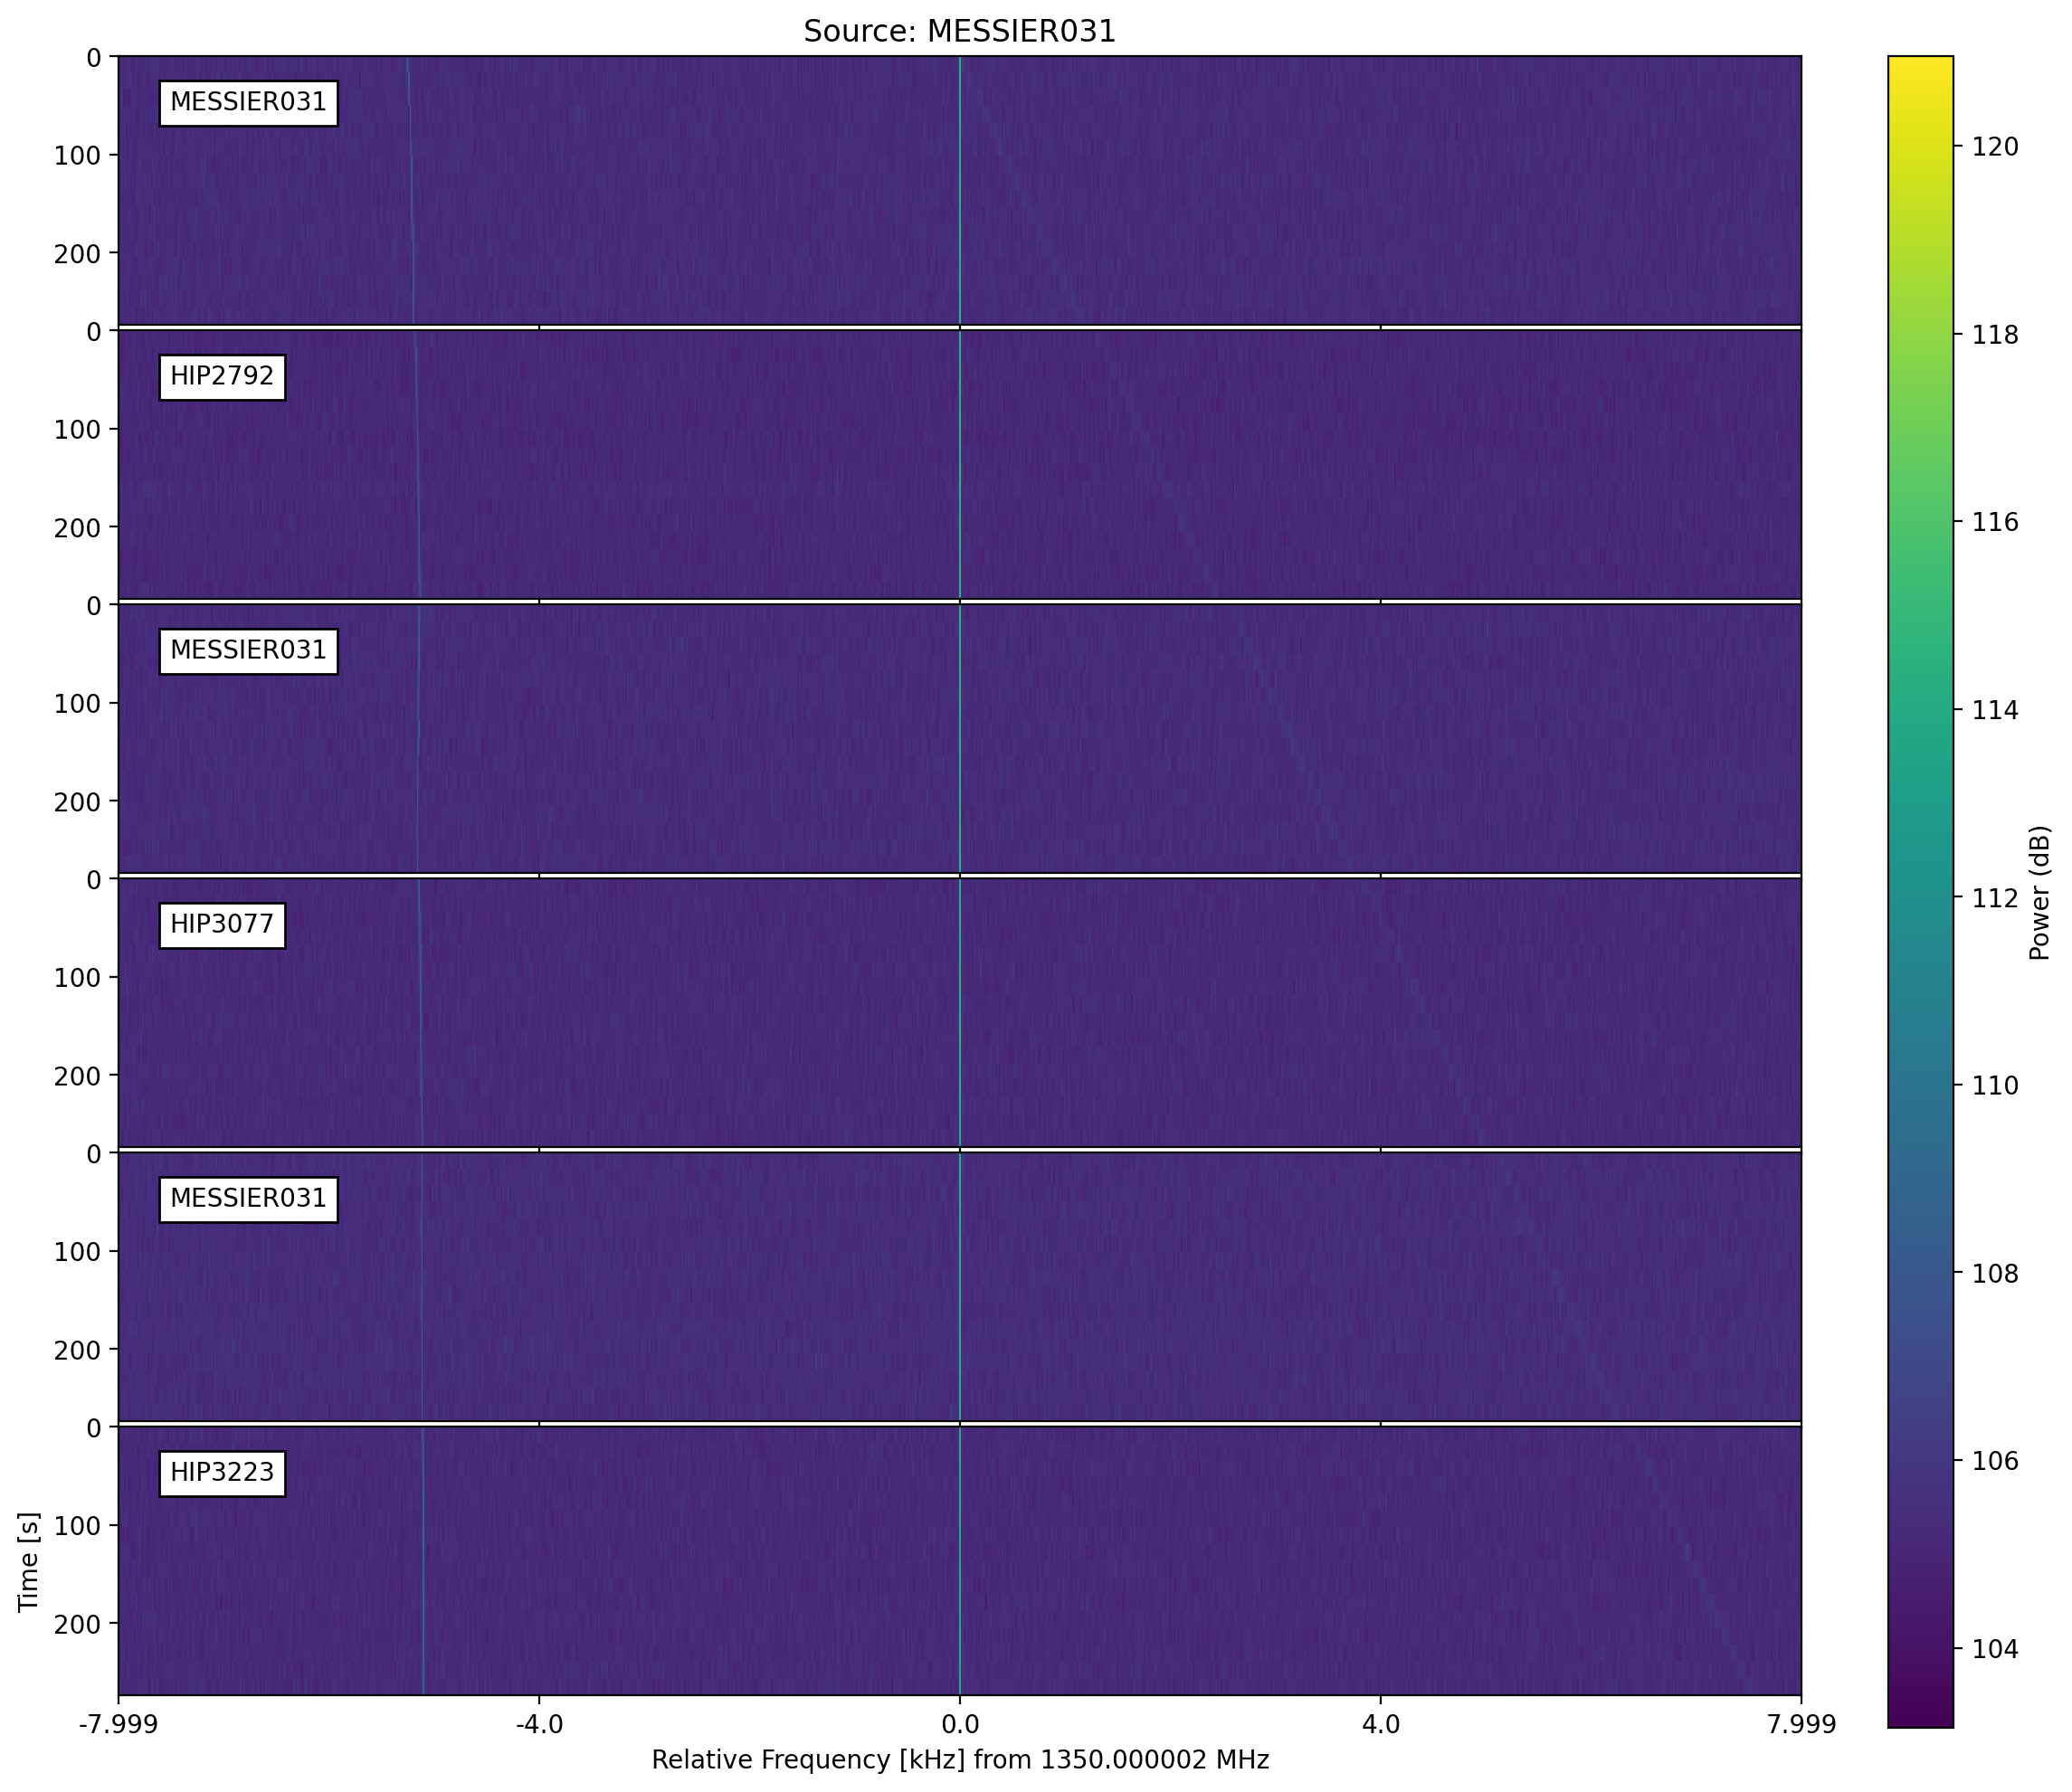

In [30]:
import time

start = time.time()

print(f'Reading Waterfalls ...')
wf = [bl.Waterfall(h5_list[i], f_start=1350-0.008, f_stop=1350+0.008) for i in range(6)]
#wf = [bl.Waterfall(h5_list[i]) for i in range(6)]
block_freqs, _ = wf[0].grab_data()
print(len(block_freqs))
print(block_freqs[0])
done_reading = time.time()
print(f'Done reading Waterfalls {done_reading-start}.')
print('Beginning Frame construction ...')

frame_list=[stg.Frame(waterfall=wf[0]),
            stg.Frame(waterfall=wf[1]),
            stg.Frame(waterfall=wf[2]),
            stg.Frame(waterfall=wf[3]),
            stg.Frame(waterfall=wf[4]),
            stg.Frame(waterfall=wf[5])]
done_frame = time.time()
print(f'Done with Frame construction {done_frame-done_reading}')

print('Converting to Cadence ...')

c = stg.Cadence(frame_list)
done_cadence = time.time()
print(f'Done converting {done_cadence-done_frame}.')
print('Adding signal ...')

c.add_signal(stg.constant_path(f_start=(1350)*u.MHz,
                               drift_rate=4*u.Hz/u.s),
                           stg.constant_t_profile(level=c[0].get_intensity(snr=100)),
                           stg.sinc2_f_profile(width=1*c[0].df*u.Hz),
                           stg.constant_bp_profile(level=1),
                           doppler_smearing=True,
                           smearing_subsamples=15)
done_adding = time.time()
print(f'Done adding signal {done_adding-done_cadence}.')

print('Attempting to add block with signal to .h5 ...')

fb = bl.Waterfall(h5_list[0])
freqs, data = fb.grab_data()
header_dict = fb.header
data[:,np.where((freqs >= block_freqs[-1]) & (freqs <= block_freqs[0]))[0]] = c[0].data
fb_new = bl.Waterfall(filename=None, header_dict=header_dict, data_array=np.expand_dims(data, axis=1))
fb_new.write_to_hdf5('/datax/scratch/benjb/C23_L_M31_injections/blc74_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5')

print('Plotting ...')

fig = plt.figure(figsize=(10, 10))
c.plot()

In [28]:
print[c[0].data.shape]

TypeError: 'builtin_function_or_method' object is not subscriptable

In [26]:
fb = bl.Waterfall(h5_list[0])
freqs, data = fb.grab_data()
header_dict = fb.header
print(freqs[0])
print(freqs[1])
print(header_dict)

1501.4648423530161
1501.4648395590484
{'DIMENSION_LABELS': array([b'time', b'feed_id', b'frequency'], dtype=object), 'az_start': 0.0, 'data_type': 1, 'fch1': 1501.4648423530161, 'foff': -2.7939677238464355e-06, 'ibeam': 1, 'machine_id': 20, 'nbeams': 1, 'nbits': 32, 'nchans': 67108864, 'nifs': 1, 'rawdatafile': 'guppi_58832_16209_MESSIER031_0057.0000.raw', 'source_name': 'MESSIER031', 'src_dej': <Angle 41.2677 deg>, 'src_raj': <Angle 0.71234667 hourangle>, 'telescope_id': 6, 'tsamp': 18.253611008, 'tstart': 58832.18760416667, 'za_start': 0.0}


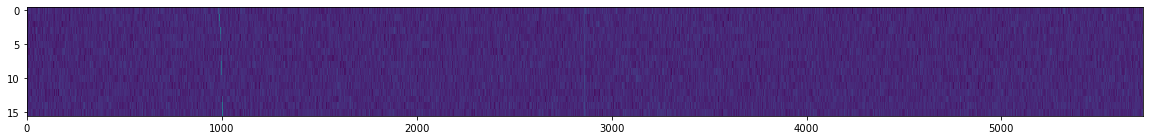

In [54]:
fb = bl.Waterfall('/datax/scratch/benjb/C23_L_M31_injections/blc74_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5',
                  f_start = 1349.992, f_stop=1350.008)
fig = plt.figure(figsize=(20, 2))
plt.imshow(np.log10(np.squeeze(fb.data))**2, aspect='auto', interpolation='none')

In [24]:
print(fb+1)

TypeError: unsupported operand type(s) for +: 'Waterfall' and 'int'

In [16]:
c = stg.Cadence(frame_list)

In [18]:
c.add_signal(stg.constant_path(f_start=c[0].get_frequency(index=1048),
                               drift_rate=0.2*u.Hz/u.s),
                           stg.constant_t_profile(level=c[0].get_intensity(snr=30)),
                           stg.sinc2_f_profile(width=2*c[0].df*u.Hz),
                           stg.constant_bp_profile(level=1),
                           doppler_smearing=True)

fig = plt.figure(figsize=(10, 10))
c.plot(f_start=c[0].get_frequency(index=1048)-0.0005, f_stop=c[0].get_frequency(index=1048)+0.0005)

KeyboardInterrupt: 

In [ ]:
# try cloning (base) into a new env, uninstalling setigen, and reinstalling using a git clone from the specific version I need

In [3]:
dats = glob.glob('/datax/scratch/benjb/injections/*_inserted.dat')
h5s = glob.glob('/datax/scratch/benjb/injections/*_inserted.h5')

In [4]:
freqs = []
drifts = []
snrs = []

for dat in dats:
    df = pd.read_table(dat, sep='\s+', 
                  names=['Top_Hit_#','Drift_Rate','SNR',
                         'Uncorrected_Frequency','Corrected_Frequency',
                         'Index', 'freq_start', 'freq_end', 'SEFD', 
                         'SEFD_freq', 'Coarse_Channel_Number',
                         'Full_number_of_hits'], skiprows=9)
    
    freq = df['Uncorrected_Frequency'].values[-1]
    drift = df['Drift_Rate'].values[-1]
    snr = df['SNR'].values[-1]
    
    freqs.append(freq)
    drifts.append(drift)
    snrs.append(snr)

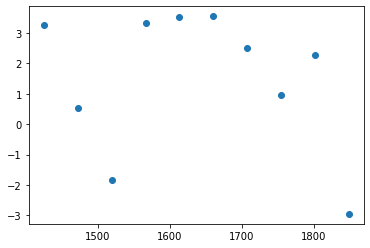

In [7]:
plt.scatter(freqs, drifts)
plt.show()

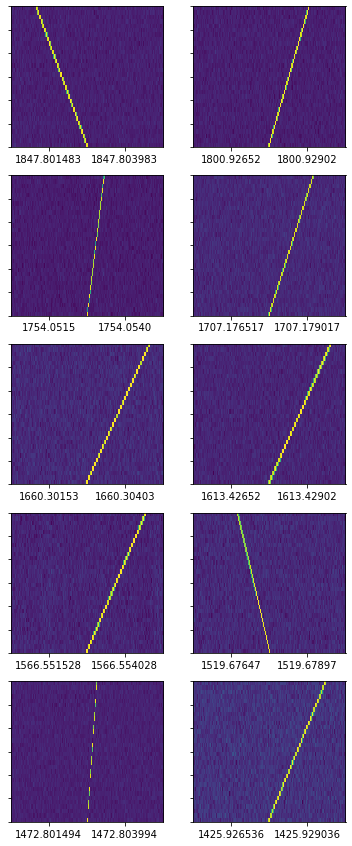

In [34]:
hbw = 0.00500/2

fig, axs = plt.subplots(5, 2, figsize=(6, 15))

for i in range(5):
    for j in range(2):
    
        file_path = h5s[2*i+j]

        freq = freqs[2*i+j]

        fb = bl.Waterfall(file_path, f_start=freq-hbw, f_stop=freq+hbw)
        #fb.plot_waterfall()

        ff, data = fb.grab_data()
        axs[i,j].imshow(np.log10(data), aspect='auto', interpolation='none', extent=[np.max(ff), np.min(ff), 0, 600], origin='lower')
        axs[i,j].invert_xaxis()
        axs[i,j].set_xticks([np.median(ff)-hbw/2, np.median(ff)+hbw/2])
        axs[i,j].set_yticklabels([])
plt.show()
#fb.plot_waterfall()

In [37]:
file_path = h5s[8]

freq = freqs[8]

fb = bl.Waterfall(file_path)
fb.info()


--- File Info ---
DIMENSION_LABELS : [b'time' b'feed_id' b'frequency']
        az_start :                              0.0
       data_type :                                1
            fch1 :           1475.0000000931323 MHz
            foff :      -2.7939677238464355e-06 MHz
      machine_id :                               20
           nbits :                               32
          nchans :                          1048576
            nifs :                                1
     source_name :                           DDO210
         src_dej :                      -12:50:54.6
         src_raj :                     20:46:51.672
    telescope_id :                                6
           tsamp :                     18.253611008
   tstart (ISOT) :          2018-07-07T08:49:26.000
    tstart (MJD) :                58306.36766203704
        za_start :                              0.0

Num ints in file :                               32
      File shape :                 (32, 1, 